In [10]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from src.plot_utils import get_subplot_dimensions, dafx_from_name

In [11]:
DATA_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/data/param_extraction"
FIG_DIR = "/home/kieran/Level5ProjectAudioVAE/src/evaluation/figures/param_visualisation"

In [12]:
emb = np.load(f"{DATA_DIR}/overdrive_projection.npy")
settings = np.load(f"{DATA_DIR}/overdrive_settings.npy")

In [13]:
dafx = dafx_from_name('mda Overdrive')

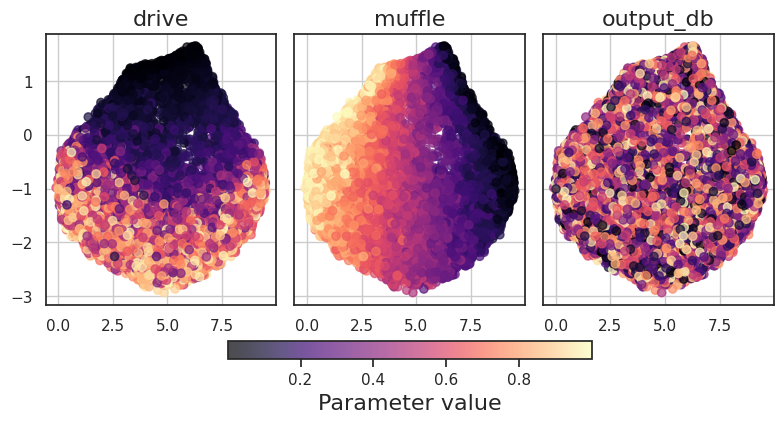

In [22]:
sns.set(style='white')

n = 3 # Define the size of the plot
max_columns = 3  # set a maximum number of columns

num_rows, num_cols = get_subplot_dimensions(n, max_columns=max_columns)
# Create the figure and subplots
fig, axs = plt.subplots(num_rows,
                        num_cols,
                        figsize=(8, 4.5),
                        sharex=True,
                        sharey=True)

count = 0
for i in range(dafx.get_num_params()):
    row_idx, col_idx = divmod(count, num_cols)

    if num_rows == 1:
            current_ax = axs[col_idx]
    elif num_cols == 1:
        current_ax = axs[row_idx]
    else:
        current_ax = axs[row_idx, col_idx]

    param_name = dafx.idx_to_param_map[i]

    sc = current_ax.scatter(x=emb[:,0], y=emb[:,1], c=settings[:,i], alpha=0.7, cmap='magma')

    current_ax.set_title(param_name, fontsize=16)
    current_ax.grid()
    current_ax.set_xlabel("")
    current_ax.set_ylabel("")
    # current_ax.set_aspect('equal', 'datalim')

    count += 1

    # If we have processed all the subplots, break out of the loop
    if count == n:
        break

# fig.suptitle(f"{DAFX_NAME} {NUM_EXAMPLES} parameter configurations latent space")

# If we have fewer subplots than required, remove the remaining subplots
while count < n:
    row_idx, col_idx = divmod(count, num_cols)
    axs[row_idx, col_idx].remove()
    # fig.delaxes()
    count += 1

# Adjust the spacing between subplots
fig.tight_layout()

# Add colorbar
cbar = fig.colorbar(sc, ax=axs.ravel().tolist(), aspect=20, shrink=.5, pad=.1, orientation='horizontal')
cbar.set_label('Parameter value', fontsize=16)

plt.savefig(f"{FIG_DIR}/overdrive_settings.pdf")